In [41]:
import pandas as pd

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [42]:
len(df)

15282

In [25]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from patsy import dmatrices

In [26]:
df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3256028,-5.0,288020.0,0.0,0.0,100.000000,1,34,1,1,...,1,1,48,0,0,1,0,0,1431,0
1,3572927,-5.0,1315.0,0.0,0.0,100.000000,1,34,0,0,...,0,0,70,1,0,1,1,0,1431,0
2,3492797,-5.0,290487.0,2.0,-5.0,95.080002,1,34,1,1,...,0,0,80,0,0,1,0,0,1431,0
3,3083982,-5.0,277642.0,0.0,0.0,100.000000,1,34,0,0,...,0,0,45,0,0,1,1,0,1431,0
4,3078243,-10.0,53657.0,0.0,-10.0,100.000000,1,43,1,1,...,1,1,89,1,0,0,1,0,1397,0


In [27]:
df.columns.values

array(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11',
       'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20',
       'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'isFraud'], dtype=object)

In [28]:
X = df.drop(['isFraud', 'TransactionID'], axis=1)
y = df['isFraud']
#X, y = dmatrices( )

In [29]:
#len(df['isFraud']) #15282

In [30]:
# Fit Random Forest model
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
# Predict and print confusion matrix
y_pred = model.predict(X)

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

print(confusion_matrix(y,y_pred))
print('Accuracy', metrics.accuracy_score(y,y_pred))

[[6333 1308]
 [1444 6197]]
Accuracy 0.8199188587881168


In [32]:
# Calculate the FPR and TPR for all thresholds of the classification
y_pred_proba = model.predict_proba(X)[::,1]

fpr, tpr, threshold = metrics.roc_curve(y, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

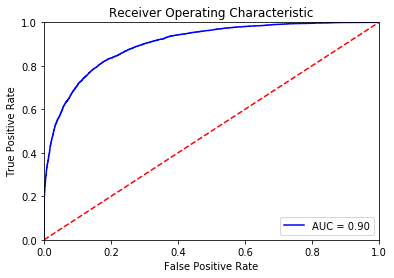

In [33]:
# Plot ROC curve
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
# Create a more balanced dataset and fit Random Forest again
#QUESTION: why no longer use cleaned_identity?
df_test = pd.read_csv('identity_test.csv').drop('Unnamed: 0', axis=1) 
mask = df_test['isFraud'] == 1
df_test_noFraud = df_test[-mask].sample(n = 15282) #15282 is the length of df['isFraud']
#df_test_noFraud = df_test_noFraud.drop(['isFraud', 'TransactionID'])

df_test_fraud = df_test[mask]

df_test_balanced = pd.concat([df_test_noFraud, df_test_fraud])

X_test = df_test_balanced.drop(['isFraud','TransactionID'], axis=1)
y_test = df_test_balanced['isFraud']

model.fit(X_test,y_test)
y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_test_pred)) #almost no improvement in accuracy

[[14113  1169]
 [ 2721  4920]]
Accuracy 0.8303014439645771


In [35]:
#len(mask) #97614

In [36]:
#len(df_test_balanced) #22923

In [37]:
df_test = pd.read_csv('identity_test.csv').drop('Unnamed: 0', axis=1)

mask = df_test['isFraud'] == 1
df_test_noFraud = df_test[-mask]
#df_test_noFraud = df_test_noFraud.drop(['isFraud', 'TransactionID'])

df_test_fraud = df_test[mask]


df_test_balanced = pd.concat([df_test_noFraud, df_test_fraud])

X_test = df_test_balanced.drop(['isFraud','TransactionID'], axis=1)
y_test = df_test_balanced['isFraud']


y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_test_pred))

[[81282  8691]
 [ 2721  4920]]
Accuracy 0.8830905402913517


In [40]:
len(df_test['isFraud'])

97614

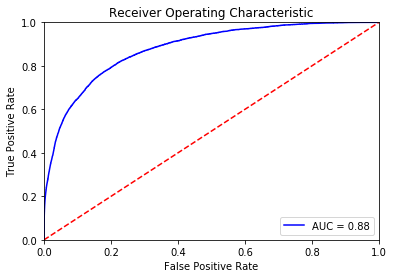

In [39]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

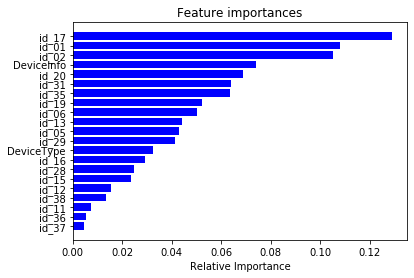

In [56]:
import numpy as np

features = X_test.columns.values
importances = model.feature_importances_

indices = np.argsort(importances)
plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#Naive bayes code?
#from sklearn import datasets
#iris = datasets.load_iris()
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)